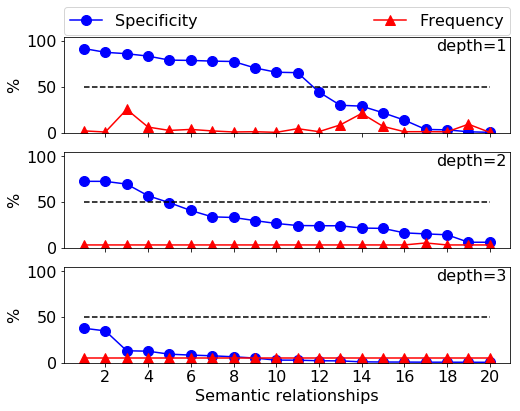

In [1]:
import numpy as np
import os, datetime
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib

dirname = './ResultsData/rwalks/'
fnames = os.listdir(dirname)

styles = ['b-', 'r-', 'g-', 'm-','c--','y--','k--','b-', 'r-', 'g-', 'y-','c-','m-','k-']
markers = ['o', '^', 'x', 's','+','v','D','o', '^', 'v', 's','+','x','D']
markerSize = 10
plotHeight = 6
plotWidth = 8
font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}
matplotlib.rc('font', **font)


enttype = 'Q11424' #Film in wikidata
scaled = '_scaled'
maxD = 3 #maxDepth

fig, ax = plt.subplots(nrows=maxD,ncols=1,figsize=(plotWidth,plotHeight))
for depth in np.arange(1,maxD+1):
    s = set()
    reverseFile = [f for f in fnames if enttype in f and '_10000_reverse' + scaled + '.txt' in f and 'depth_' + str(depth) in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    s = set(reverseData['prop'].tolist()[0:])
    
    #reverseFile = [f for f in fnames if enttype in f and '_reverse_subclass' + scaled + '.txt' in f and 'depth_' + str(depth) in f][0]
    #reverseData = pd.read_csv(dirname + reverseFile, header=None)
    #reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    #s = s.intersection(set(reverseData['prop'].tolist()[0:]))

    reverseFile = [f for f in fnames if enttype in f and '_forward.txt' in f and 'depth_' + str(depth) in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    s = s.intersection(set(reverseData['prop'].tolist()[0:]))
    
    
    s = list(s)

    
    if depth == 1:
        tx = plt.subplot(maxD,1,depth)
        plt.setp(tx.get_xticklabels(), visible=False)
    elif depth == 2:
        tx2 = plt.subplot(maxD,1,depth,sharex=tx) 
        plt.setp(tx2.get_xticklabels(), visible=False)
    elif depth == 3:
        tx2 = plt.subplot(maxD,1,depth,sharex=tx)  
        
        
    idx = 0
    
    reverseFile = [f for f in fnames if enttype in f and '_10000_reverse' + scaled + '.txt' in f and 'depth_' + str(depth) in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    lastColIdx = reverseData.columns.tolist()[-1:]
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    reverseData = reverseData[reverseData['prop'].isin(s)]
    refList = reverseData['prop'].tolist()[:20]
    XP = np.arange(1,len(refList)+1)
    YP = [t[0] for t in reverseData[lastColIdx].values.tolist()][:20] 
    plt.plot(XP, YP, styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='Specificity', marker = markers[idx], markersize = markerSize)
    
    #print(refList)
    #print(depth)
        
    idx = idx + 1
    reverseFile = [f for f in fnames if enttype in f and '_forward.txt' in f and 'depth_' + str(depth) in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    lastColIdx = reverseData.columns.tolist()[-1:]
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    reverseData = reverseData[reverseData['prop'].isin(s)]
    thisList = reverseData['prop'].tolist()
    thisValues = reverseData[lastColIdx].values.tolist()
    indices= [] #[thisList.index(s) if s in thisList else 0 for s in refList]
    for iy in refList:
        indices.append(np.where(np.in1d(thisList,iy))[0][0])
    YP = np.take(thisValues,indices)
    #YP = [t[0] for t in reverseData[lastColIdx].values.tolist()]#[:15] 
    plt.plot(XP, YP, styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='Frequency', marker = markers[idx], markersize = markerSize)
    
    #tt = 50.0*np.ones((len(XP),), dtype=float)
    #plt.plot(XP, tt, 'k--',label=None)
    plt.text(17.5, 90, 'depth=' + str(depth), fontdict=font)
    plt.xticks(np.arange(0,len(refList)+1,2))
    plt.yticks([0,50,100])
    plt.ylim(0.0,105.0)
    tt = 50.0*np.ones((len(XP),), dtype=float)
    plt.plot(XP, tt, 'k--',label=None)
    if depth == maxD:
        plt.xlabel('Semantic relationships')
    plt.ylabel('%')
    if depth == 1:
        plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), #fontsize = 'small',
               ncol=4, mode="expand", borderaxespad=0.)
        #break
#plt.savefig(dirname + "/results/" + enttype + '_top_25_specificity.png', format='png', dpi=800, bbox_inches='tight')
plt.show()

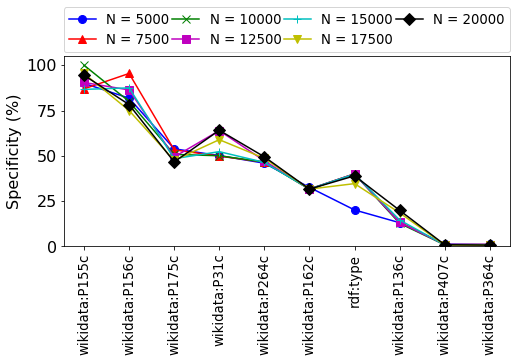

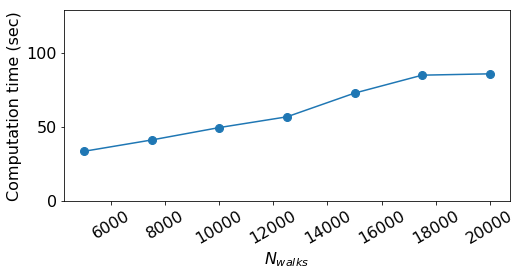

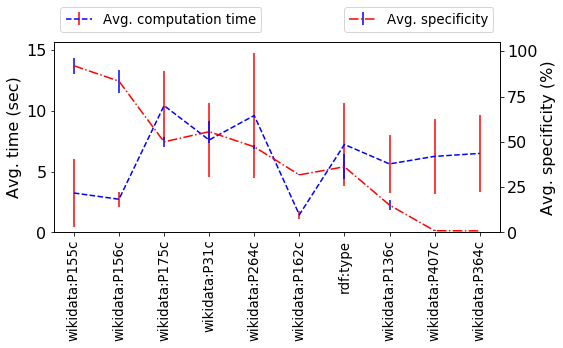

In [2]:
import numpy as np
import os, datetime
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib

dirname = './ResultsData/rwalks/'
fnames = os.listdir(dirname)

styles = ['b-', 'r-', 'g-', 'm-','c-','y-','k-','b--', 'r--', 'g--', 'm--','c--','y--','k--']
#styles = ['-', '--','-.',':']
colors = ['0.35', '0.5', '0.65', '0.8']
markers = ['o', '^', 'x', 's','+','v','D','x', '^', 'v', 's','+','D','o']
markerSize = 8
plotHeight = 3.5
plotWidth = 8

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}

matplotlib.rc('font', **font)

tt1 = np.arange(5000,20000+1,2500)
#tt2 = np.arange(500,2500,500)
tt = np.unique(np.sort(np.concatenate([tt1,tt1])))
#t = np.arange(20000,5000-1,-2500)

#enttypes = ['Film','Book','Album']
enttypes = ['Q11424','Q571','Q482994'] #['Film','Book','Album'] in wikidata
enttype = enttypes[2]
suffix = '_reverse.txt'
depthno = 'depth_1'
topk = 15
s = set()
specData = []
for depth in tt:
    reverseFile = [f for f in fnames if '_' + str(depth) + suffix in f and depthno in f and enttype in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    if len(s) != 0:
        s = s.intersection(set(reverseData['prop'].tolist()[0:25]))
    else:
        s = set(reverseData['prop'].tolist()[0:25])
s = list(s)

#s = [x for x in s if 'http://dbpedia.org/property/' not in x and 'sameAs' not in x] #redundant properties
#print(s)

#s = ['http://dbpedia.org/ontology/distributor', 'http://dbpedia.org/ontology/cinematography', 'http://dbpedia.org/ontology/language', 'http://dbpedia.org/ontology/director', 'http://www.w3.org/2002/07/owl#sameAs', 'http://dbpedia.org/ontology/editing', 'http://purl.org/dc/terms/subject', 'http://dbpedia.org/ontology/producer', 'http://dbpedia.org/ontology/writer', 'http://dbpedia.org/ontology/starring', 'http://dbpedia.org/ontology/musicComposer', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type']
#print(s)

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
#plt.yscale('log')
idx = 0
XP = np.arange(1,len(s)+1)
for depth in tt:
    reverseFile = [f for f in fnames if '_' + str(depth) + suffix in f and depthno in f and enttype in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    lastColIdx = reverseData.columns.tolist()[-1:]
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    reverseData = reverseData[reverseData['prop'].isin(s)]
    
    if depth == tt[0]:
        refList = reverseData['prop'].tolist()[:topk]
        YP = [t[0] for t in reverseData[lastColIdx].values.tolist()][:topk] 
        XP = np.arange(1,len(refList)+1)
        specData = YP
        plt.plot(XP, YP, styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='N = ' + str(depth), marker = markers[idx], markersize = markerSize)
    else:
        thisList = reverseData['prop'].tolist()
        thisValues = reverseData[lastColIdx].values.tolist()
        indices= []
        for iy in refList:
            indices.append(np.where(np.in1d(thisList,iy))[0][0])
        YP = np.take(thisValues,indices)
        specData = np.vstack((specData,YP))
        plt.plot(XP, YP, styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='N = ' + str(depth), marker = markers[idx], markersize = markerSize)
    idx = idx + 1

#print(XP)
#print(refList)
#XP = [1,2,3,4,5,6,8,9,10,11,12]
refL = [x.replace('http://dbpedia.org/ontology/','dbo:').replace('http://purl.org/dc/terms/','dct:')
        .replace('http://www.w3.org/1999/02/22-rdf-syntax-ns#','rdf:').replace('http://www.w3.org/ns/prov#','prov:')
        .replace('http://xmlns.com/foaf/0.1/','foaf:').replace('http://www.w3.org/2002/07/owl#','owl:')
        .replace('http://www.wikidata.org/entity/','wikidata:').replace('http://www.w3.org/2000/01/rdf-schema#','rdfs:')
       for x in refList]
plt.xticks(np.arange(1,len(refList)+1),refL,rotation=90, fontsize='small')
#plt.xticks(refL)
plt.ylim(0.0,105.0)
#plt.xlabel('Semantic relationships')
plt.ylabel('Specificity (%)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=4, mode="expand", borderaxespad=0.)
plt.savefig(dirname + "results/" + enttype + '_' + depthno + '_' + suffix.replace('.txt','') 
            + '_specificity_with_N.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

suffix = '_reverse_time.txt'
specData1 = []
idx = 0
XP = np.arange(1,len(s)+1)
for depth in tt:
    reverseFile = [f for f in fnames if '_' + str(depth) + suffix in f and depthno in f and enttype in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    lastColIdx = reverseData.columns.tolist()[-1:]
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    reverseData = reverseData[reverseData['prop'].isin(s)]
    
    if depth == tt[0]:
        #refList = reverseData['prop'].tolist()[:topk]
        YP = [t[0] for t in reverseData[lastColIdx].values.tolist()][:topk] 
        XP = np.arange(1,len(refList)+1)
        specData1 = YP
    else:
        thisList = reverseData['prop'].tolist()
        thisValues = reverseData[lastColIdx].values.tolist()
        indices= []
        for iy in refList:
            indices.append(np.where(np.in1d(thisList,iy))[0][0])
        YP = np.take(thisValues,indices)
        specData1 = np.vstack((specData1,YP))

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
YP = np.sum(specData1,axis=1)
plt.plot(tt, YP, #yerr = np.std(specData,axis=0), #styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='Computation time (sec)', marker = markers[0], markersize = 8)
plt.ylim(0.0,np.max(YP)*1.5)
#plt.xticks(np.arange(1,len(refList)+1),refL,rotation=90, fontsize = 'small')
plt.ylabel('Computation time (sec)')
plt.xlabel('$N_{walks}$')
#plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
#           ncol=1, mode="expand", borderaxespad=0.)
plt.xticks(rotation=30)#, fontsize = 'small')
#plt.ylim(0,400)
plt.savefig(dirname + "results/" + enttype + '_' + depthno + '_total_' + suffix.replace('.txt','') 
            + '_specificity_with_N_time.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

fig, ax1 = plt.subplots(figsize=(plotWidth,plotHeight))
YP = np.mean(specData1,axis=0)
YPs = np.mean(specData,axis=0)
ax1.errorbar(XP, YP, yerr = np.std(specData1,axis=0), color='blue', linestyle='--', #styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='Avg. computation time', ecolor='red')#, marker = markers[idx], markersize = 5)
ax1.set_ylim(0.0,np.max(YP)*1.5)
ax1.set_xticks(np.arange(1,len(refList)+1))
ax1.set_xticklabels(refL, {'rotation':90, 'fontsize':'small'})
ax1.set_ylabel('Avg. time (sec)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=1)#, mode="expand", borderaxespad=0.)
ax2 = ax1.twinx()
ax2.errorbar(XP, YPs, yerr = np.std(specData,axis=0), color='red', linestyle='-.', #s[idx], #color=colors[0], linestyle=styles[0], 
                 label='Avg. specificity', ecolor='blue')#, marker = markers[idx], markersize = 5)
ax2.set_ylabel('Avg. specificity (%)')
ax2.set_ylim(0.0,105.0)
plt.legend(loc = 4, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=1)#, mode="expand", borderaxespad=0.)
plt.savefig(dirname + "results/" + enttype + '_' + depthno + '_comb_' + suffix.replace('.txt','') 
           + '_specificity_with_N_time.png', format='png', dpi=600, bbox_inches='tight')
plt.show()



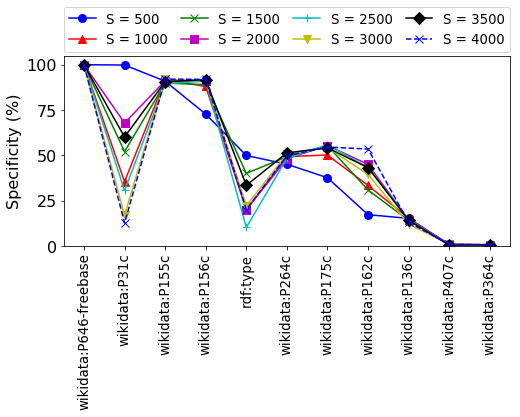

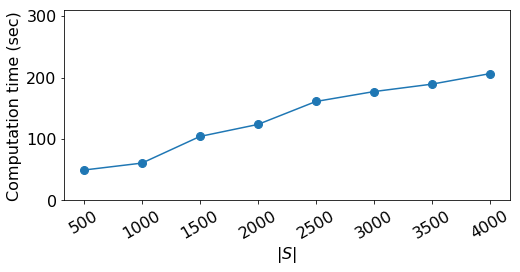

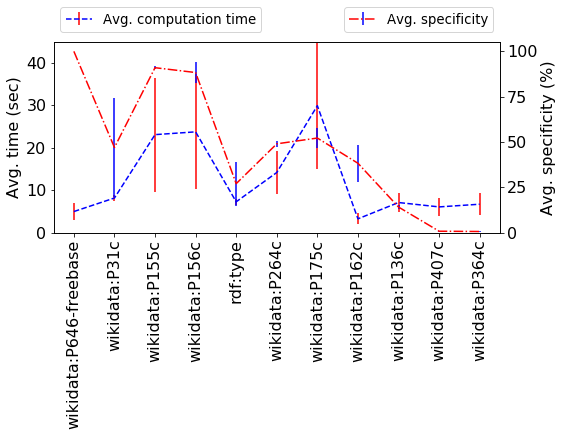

In [3]:
import numpy as np
import os, datetime
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib

dirname = './ResultsData/seeds/'

fnames = os.listdir(dirname)

styles = ['b-', 'r-', 'g-', 'm-','c-','y-','k-','b--', 'r--', 'g--', 'm--','c--','y--','k--']
#styles = ['-', '--','-.',':']
#colors = ['0.35', '0.5', '0.65', '0.8']
markers = ['o', '^', 'x', 's','+','v','D','x', '^', 'v', 's','+','D','o']
markerSize = 8
plotHeight = 3.5
plotWidth = 8

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 16}

matplotlib.rc('font', **font)

tt1 = np.arange(500,4000+1,500)
#tt2 = np.arange(500,2500,500)
tt = np.unique(np.sort(np.concatenate([tt1,tt1])))
#t = np.arange(20000,5000-1,-2500)

#enttypes = ['Film','Book','Album']
enttypes = ['Q11424','Q571','Q482994'] #['Film','Book','Album'] in wikidata
enttype = enttypes[2]
suffix = '_10000_reverse.txt'
depthno = '_depth_1'
topk = 15
s = set()
specData = []
for depth in tt:
    reverseFile = [f for f in fnames if '_' + str(depth) + depthno in f and suffix in f and enttype in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    if len(s) != 0:
        s = s.intersection(set(reverseData['prop'].tolist()[0:25]))
    else:
        s = set(reverseData['prop'].tolist()[0:25])
s = list(s)

#s = [x for x in s if 'http://dbpedia.org/property/' not in x and 'sameAs' not in x] #redundant properties
#print(s)

#s = ['http://dbpedia.org/ontology/distributor', 'http://dbpedia.org/ontology/cinematography', 'http://dbpedia.org/ontology/language', 'http://dbpedia.org/ontology/director', 'http://www.w3.org/2002/07/owl#sameAs', 'http://dbpedia.org/ontology/editing', 'http://purl.org/dc/terms/subject', 'http://dbpedia.org/ontology/producer', 'http://dbpedia.org/ontology/writer', 'http://dbpedia.org/ontology/starring', 'http://dbpedia.org/ontology/musicComposer', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type']
#print(s)
fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
#plt.yscale('log')
idx = 0
XP = np.arange(1,len(s)+1)
for depth in tt:
    reverseFile = [f for f in fnames if '_' + str(depth) + depthno in f and suffix in f and enttype in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    lastColIdx = reverseData.columns.tolist()[-1:]
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    reverseData = reverseData[reverseData['prop'].isin(s)]
    
    if depth == tt[0]:
        refList = reverseData['prop'].tolist()[:topk]
        YP = [t[0] for t in reverseData[lastColIdx].values.tolist()][:topk] 
        XP = np.arange(1,len(refList)+1)
        specData = YP
        plt.plot(XP, YP, styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='S = ' + str(depth), marker = markers[idx], markersize = markerSize)
    else:
        thisList = reverseData['prop'].tolist()
        thisValues = reverseData[lastColIdx].values.tolist()
        indices= []
        for iy in refList:
            indices.append(np.where(np.in1d(thisList,iy))[0][0])
        YP = np.take(thisValues,indices)
        specData = np.vstack((specData,YP))
        plt.plot(XP, YP, styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='S = ' + str(depth), marker = markers[idx], markersize = markerSize)
    idx = idx + 1

refL = [x.replace('http://dbpedia.org/ontology/','dbo:').replace('http://purl.org/dc/terms/','dct:')
        .replace('http://www.w3.org/1999/02/22-rdf-syntax-ns#','rdf:').replace('http://www.w3.org/ns/prov#','prov:')
        .replace('http://xmlns.com/foaf/0.1/','foaf:').replace('http://www.w3.org/2002/07/owl#','owl:')
        .replace('http://www.wikidata.org/entity/','wikidata:').replace('http://www.w3.org/2000/01/rdf-schema#','rdfs:')
       for x in refList]
plt.xticks(np.arange(1,len(refList)+1),refL,rotation=90, fontsize='small')
#plt.xticks(refL)
plt.ylim(0.0,105.0)
#plt.xlabel('Semantic relationships')
plt.ylabel('Specificity (%)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=4, mode="expand", borderaxespad=0.)
plt.savefig(dirname + "results/" + enttype + '_' + depthno + '_' + suffix.replace('.txt','') 
            + '_specificity_with_S.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

idx = 0

suffix = '_reverse_time.txt'
specData1 = []
XP = np.arange(1,len(s)+1)
for depth in tt:
    reverseFile = [f for f in fnames if '_' + str(depth) + depthno in f and suffix in f and enttype in f][0]
    reverseData = pd.read_csv(dirname + reverseFile, header=None)
    lastColIdx = reverseData.columns.tolist()[-1:]
    reverseData['prop'] = reverseData.iloc[:,0:-1].apply(lambda x: ','.join(x), axis=1)
    reverseData = reverseData[reverseData['prop'].isin(s)]
    
    if depth == tt[0]:
        YP = [t[0] for t in reverseData[lastColIdx].values.tolist()][:topk] 
        XP = np.arange(1,len(refList)+1)
        specData1 = YP
    else:
        thisList = reverseData['prop'].tolist()
        thisValues = reverseData[lastColIdx].values.tolist()
        indices= []
        for iy in refList:
            indices.append(np.where(np.in1d(thisList,iy))[0][0])
        YP = np.take(thisValues,indices)
        specData1 = np.vstack((specData1,YP))

fig, ax = plt.subplots(figsize=(plotWidth,plotHeight))
YP = np.sum(specData1,axis=1)
plt.plot(tt, YP, #yerr = np.std(specData,axis=0), #styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='Computation time (sec)', marker = markers[0], markersize = 8)
plt.ylim(0,np.max(YP)*1.5)
#plt.ylim(0.0,105.0)
#plt.xticks(np.arange(1,len(refList)+1),refL,rotation=90, fontsize = 'small')
plt.ylabel('Computation time (sec)')
plt.xlabel('$|S|$')
#plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
#           ncol=1, mode="expand", borderaxespad=0.)
plt.xticks(rotation=30)#, fontsize = 'small')
plt.savefig(dirname + "results/" + enttype + '_' + depthno + '_total_' + suffix.replace('.txt','') 
            + '_specificity_with_S_time.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

fig, ax1 = plt.subplots(figsize=(plotWidth,plotHeight))
YP = np.mean(specData1,axis=0)
YPs = np.mean(specData,axis=0)
ax1.errorbar(XP, YP, yerr = np.std(specData1,axis=0), color='blue', linestyle='--', #styles[idx], #color=colors[0], linestyle=styles[0], 
                 label='Avg. computation time', ecolor='red')#, marker = markers[idx], markersize = 5)
ax1.set_ylim(0.0,np.max(YP)*1.5)
ax1.set_xticks(np.arange(1,len(refList)+1))
ax1.set_xticklabels(refL, {'rotation':90})
ax1.set_ylabel('Avg. time (sec)')
plt.legend(loc = 3, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=1)#, mode="expand", borderaxespad=0.)
ax2 = ax1.twinx()
ax2.errorbar(XP, YPs, yerr = np.std(specData,axis=0), color='red', linestyle='-.', #s[idx], #color=colors[0], linestyle=styles[0], 
                 label='Avg. specificity', ecolor='blue')#, marker = markers[idx], markersize = 5)
ax2.set_ylabel('Avg. specificity (%)')
ax2.set_ylim(0.0,105.0)
plt.legend(loc = 4, bbox_to_anchor=(0., 1.02, 1., .102), fontsize = 'small',
           ncol=1)#, mode="expand", borderaxespad=0.)
plt.savefig(dirname + "results/" + enttype + '_' + depthno + '_comb_' + suffix.replace('.txt','') 
           + '_specificity_with_S_time.png', format='png', dpi=600, bbox_inches='tight')
plt.show()

